In [116]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

In [117]:
import io

In [118]:
from google.colab import files
uploaded = files.upload()

Saving HD.csv to HD.csv


In [119]:
df = pd.read_csv(io.BytesIO(uploaded['HD.csv']))
print(df)

           Date        Open        High         Low       Close   Adj Close  \
0      1/4/2010   29.150000   29.150000   28.549999   28.670000   20.551073   
1      1/5/2010   28.730000   28.990000   28.290001   28.879999   20.701614   
2      1/6/2010   28.879999   29.000000   28.700001   28.780001   20.629927   
3      1/7/2010   28.860001   29.219999   28.730000   29.120001   20.873646   
4      1/8/2010   29.000000   29.240000   28.690001   28.980000   20.773291   
...         ...         ...         ...         ...         ...         ...   
2635  6/23/2020  253.000000  253.440002  250.130005  250.309998  230.219467   
2636  6/24/2020  247.809998  250.289993  242.729996  246.130005  226.374954   
2637  6/25/2020  244.800003  246.350006  242.199997  245.380005  225.685181   
2638  6/26/2020  245.350006  246.100006  240.250000  241.009995  221.665909   
2639  6/29/2020  242.660004  246.500000  240.339996  246.119995  226.365753   

         Average  
0      27.214214  
1      27.118

In [120]:
data_training = df[df['Date'] < '2020-03-15'].copy()
data_testing = df[df['Date'] >= '2020-03-15'].copy()

In [121]:
data_training = data_training.drop(['Date'], axis = 1)

In [122]:
scaler = MinMaxScaler()
data_training = scaler.fit_transform(data_training)
data_training

array([[0.00753425, 0.00560518, 0.00627276, 0.00605426, 0.00465625,
        0.00563503],
       [0.00561644, 0.00487605, 0.00507357, 0.00701019, 0.00539151,
        0.00518944],
       [0.00630137, 0.00492162, 0.00696462, 0.00655499, 0.00504138,
        0.00555961],
       ...,
       [0.96621007, 0.97119938, 0.95535264, 0.94655861, 0.94792444,
        0.96041255],
       [0.92954341, 0.94285457, 0.91038239, 0.8985342 , 0.90112736,
        0.91939853],
       [0.87273975, 0.88014946, 0.85392741, 0.8671704 , 0.87056504,
        0.87145519]])

In [123]:
x_train = []
y_train = []

for i in range(60, data_training.shape[0]):
    x_train.append(data_training[i-20:i])
    y_train.append(data_training[i, 0])

x_train = np.array(x_train)
y_train = np.array(y_train)

In [124]:
x_train.shape

(1008, 20, 6)

In [125]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional

In [126]:
regressorGRU = Sequential()

regressorGRU.add(GRU(units = 60, activation = 'relu', return_sequences = True, input_shape = (x_train.shape[1], 6)))
regressorGRU.add(Dropout(0.2))

regressorGRU.add(GRU(units = 60, activation = 'relu', return_sequences = True))
regressorGRU.add(Dropout(0.2))

regressorGRU.add(GRU(units = 80, activation = 'relu', return_sequences = True))
regressorGRU.add(Dropout(0.2))

regressorGRU.add(GRU(units = 120, activation = 'relu'))
regressorGRU.add(Dropout(0.2))

regressorGRU.add(Dense(units = 1))

In [127]:
regressorGRU.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_20 (GRU)                (None, 20, 60)            12240     
                                                                 
 dropout_20 (Dropout)        (None, 20, 60)            0         
                                                                 
 gru_21 (GRU)                (None, 20, 60)            21960     
                                                                 
 dropout_21 (Dropout)        (None, 20, 60)            0         
                                                                 
 gru_22 (GRU)                (None, 20, 80)            34080     
                                                                 
 dropout_22 (Dropout)        (None, 20, 80)            0         
                                                                 
 gru_23 (GRU)                (None, 120)              

In [128]:
regressorGRU.compile(optimizer = 'adam', loss = 'mean_squared_error')
regressorGRU.fit(x_train, y_train, epochs = 50, batch_size = 32)

Epoch 1/50
32/32 [==============================] - 7s 43ms/step - loss: 0.0453
Epoch 2/50
32/32 [==============================] - 2s 52ms/step - loss: 0.0045
Epoch 3/50
32/32 [==============================] - 2s 69ms/step - loss: 0.0044
Epoch 4/50
32/32 [==============================] - 1s 44ms/step - loss: 0.0034
Epoch 5/50
32/32 [==============================] - 1s 44ms/step - loss: 0.0035
Epoch 6/50
32/32 [==============================] - 1s 43ms/step - loss: 0.0037
Epoch 7/50
32/32 [==============================] - 1s 43ms/step - loss: 0.0031
Epoch 8/50
32/32 [==============================] - 1s 44ms/step - loss: 0.0029
Epoch 9/50
32/32 [==============================] - 1s 43ms/step - loss: 0.0036
Epoch 10/50
32/32 [==============================] - 1s 46ms/step - loss: 0.0028
Epoch 11/50
32/32 [==============================] - 2s 72ms/step - loss: 0.0026
Epoch 12/50
32/32 [==============================] - 1s 43ms/step - loss: 0.0029
Epoch 13/50
32/32 [==================

In [129]:
data_testing.head()

,Date,Open,High,Low,Close,Adj Close,Average
38,3/1/2010,31.240000,31.549999,31.090000,31.430000,22.529491,29.567898
39,3/2/2010,31.389999,31.580000,31.270000,31.360001,22.479313,29.615863
40,3/3/2010,31.430000,31.809999,31.320000,31.469999,22.558161,29.717632
41,3/4/2010,31.540001,31.580000,31.299999,31.440001,22.536654,29.679331
42,3/5/2010,31.549999,31.910000,31.490000,31.799999,22.794710,29.908942


In [130]:
past_20_days = data_testing.tail(20)

In [131]:
df = past_20_days.append(data_testing, ignore_index = True)
df = df.drop(['Date'], axis = 1)
df.head()

<ipython-input-131-08f6f3976b94>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = past_20_days.append(data_testing, ignore_index = True)


,Open,High,Low,Close,Adj Close,Average
0,248.630005,252.720001,247.000000,252.710007,231.047241,246.421451
1,251.800003,252.830002,250.389999,251.000000,230.854111,247.374823
2,249.770004,252.169998,247.470001,248.949997,228.968643,245.465729
3,252.339996,255.850006,250.380005,254.899994,234.441010,249.582202
4,252.490005,256.809998,252.259995,256.769989,236.160950,250.898187


In [132]:
inputs = scaler.transform(df)
inputs

array([[1.00972605, 1.02442581, 1.013837  , 1.02590132, 1.03273921,
        1.02424605],
       [1.02420093, 1.02492709, 1.02947281, 1.01811724, 1.03179595,
        1.02867617],
       [1.01493153, 1.02191942, 1.0160048 , 1.00878547, 1.02258714,
        1.019805  ],
       ...,
       [0.99223746, 0.9953974 , 0.99169779, 0.9925346 , 1.00655041,
        0.99851018],
       [0.99474889, 0.99425813, 0.98270375, 0.97264198, 0.98691991,
        0.98918009],
       [0.98246577, 0.99608093, 0.98311884, 0.99590309, 1.00987439,
        0.99625236]])

In [133]:
x_test = []
y_test = []

for i in range(20, inputs.shape[0]):
    x_test.append(inputs[i-20:i])
    y_test.append(inputs[i,0])

x_test = np.array(x_test)
y_test = np.array(y_test)
x_test.shape, y_test.shape

((1572, 20, 6), (1572,))

In [134]:
x_test.shape

(1572, 20, 6)

In [135]:
y_pred = regressorGRU.predict(x_test)

50/50 [==============================] - 1s 13ms/step


In [136]:
scaler.scale_

array([0.00456621, 0.00455705, 0.00461233, 0.00455208, 0.00488409,
       0.00464679])

In [137]:
scale = 1 / 0.00456621
scale

219.00000219

In [138]:
y_pred = y_pred * scale
y_test = y_test * scale

In [139]:
y_pred.shape

(1572, 1)

In [140]:
y_test.shape

(1572,)

In [141]:
y_pred[1503:]

array([[134.54723],
       [130.73055],
       [129.79424],
       [130.844  ],
       [133.08884],
       [135.23723],
       [137.26414],
       [138.53035],
       [138.04967],
       [136.96965],
       [135.94357],
       [136.2611 ],
       [137.99187],
       [139.65973],
       [141.7074 ],
       [143.32103],
       [145.26599],
       [146.38124],
       [147.06052],
       [148.46667],
       [149.89436],
       [150.46727],
       [150.74997],
       [151.00743],
       [151.88367],
       [153.77567],
       [156.12361],
       [158.3146 ],
       [159.80702],
       [160.65466],
       [161.43257],
       [162.74065],
       [164.06163],
       [165.49779],
       [167.26712],
       [169.06088],
       [170.58842],
       [171.413  ],
       [171.79909],
       [172.64496],
       [174.4556 ],
       [175.69437],
       [176.46143],
       [176.9541 ],
       [177.47699],
       [178.37558],
       [179.2815 ],
       [180.2753 ],
       [181.08957],
       [181.80472],


In [142]:
y_test[1503:]

array([122.55999923, 145.89000046, 156.91999957, 155.99000656,
       160.99000661, 163.07000863, 167.30000467, 148.41000548,
       147.44999847, 152.05999952, 160.5000016 , 175.41999975,
       166.71000867, 172.30000472, 172.94999873, 174.38000674,
       171.16999971, 171.61999672, 179.6699998 , 178.63000679,
       173.25000173, 174.39000074, 175.82000876, 177.22999777,
       187.53999488, 196.49000696, 193.83999794, 189.28999489,
       189.27000589, 189.17999489, 197.44000397, 199.869997  ,
       199.00999699, 205.19999905, 204.27000604, 211.07000911,
       205.53999506, 198.86999699, 205.28999505, 218.33999818,
       212.94999913, 214.50000214, 210.1199971 , 213.19999913,
       220.64999621, 215.19000415, 222.02000622, 217.56000018,
       221.91000622, 221.13000721, 224.30000524, 222.27000622,
       224.83999825, 224.99000725, 227.83000428, 229.9500143 ,
       221.36000321, 215.57000916, 210.1199971 , 221.89999622,
       225.27000625, 221.86000322, 225.60000826, 218.19

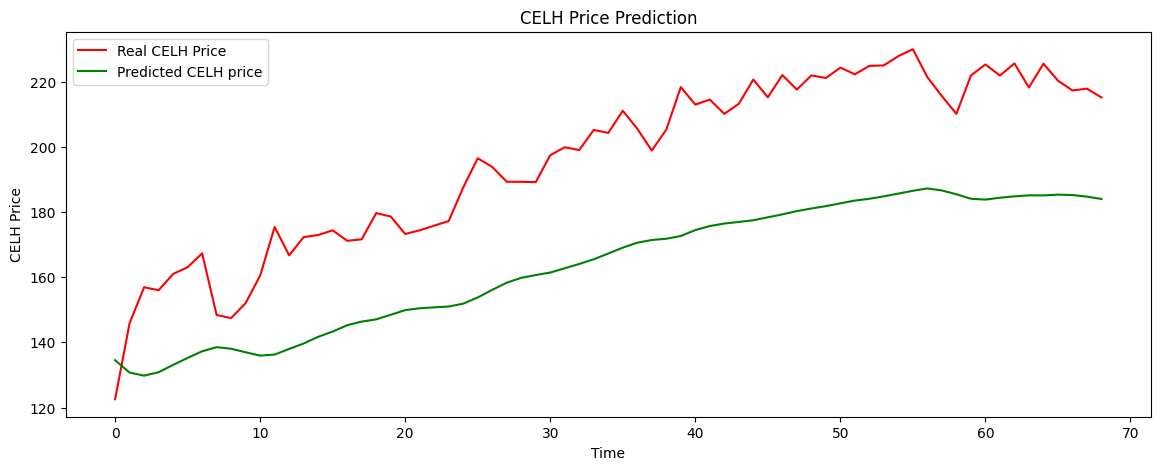

In [143]:
plt.figure(figsize = (14,5))
plt.plot(y_test[1503:], color = 'red', label = 'Real CELH Price')
plt.plot(y_pred[1503:], color = 'green', label = 'Predicted CELH price')
plt.title('CELH Price Prediction')
plt.xlabel('Time')
plt.ylabel('CELH Price')
plt.legend()
plt.show()